# **Análise das Exportações e Importações do Brasil (1996-2023)**

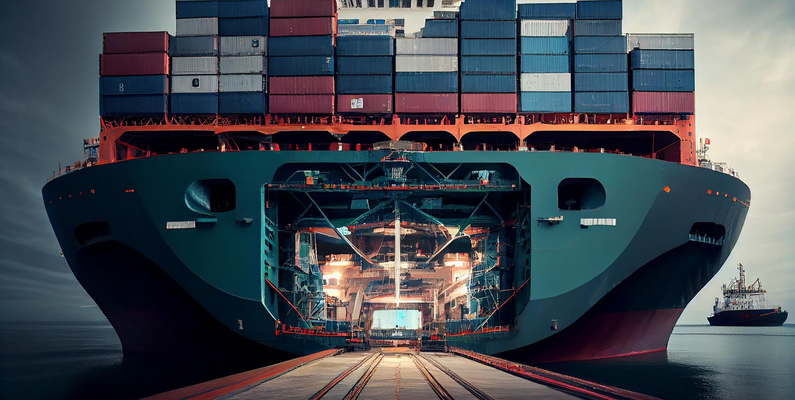

Este projeto visa analisar os dados de exportações e importações do Brasil entre 1996 e 2023, utilizando a biblioteca Pandas em Python. A análise inclui a seleção, agrupamento e visualização dos dados para gerar insights sobre os valores de transações comerciais ao longo dos anos e os principais países de destino e origem. Os dados foram extraídos do sistema Comex Stat do Governo Federal Brasileiro.

## Fonte dos Dados

- **Fonte:** [Governo Federal Brasileiro](https://www.gov.br/pt-br)
- **Download da Base de Dados:** [Kaggle](https://www.kaggle.com/datasets/yousefmoterassed/importaoexportao-do-brasil-desde-1996-a-2023?select=BRASIL_EXP_COMPLETO.csv) ou
- **Google Drive:** [Clique aqui para baixar no meu drive](https://https://drive.google.com/drive/folders/15R9k41PckVdGhHWmsK5BJ5DjcY4u6Wrb?usp=sharing).


## Instalando e importando as bibliotecas necessárias

In [39]:
!pip install pandas
!pip install matplotlib
!pip install plotly.express

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Carregando os dados dos arquivos CSV do Google Colab

### Como hospedei no Drive o banco de dados que vamos usar, usei a propria biblioteca do google para montar a unidade de onde pegarei as informações:

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Carregando os dados dos arquivos CSV
df_exportacoes = pd.read_csv('/content/drive/MyDrive/Base de dados dos projetos no portifolio/Projeto Importação exportação do Brasil desde 1996 a 2023/BRASIL_EXP_COMPLETO.csv', encoding='latin-1', sep = ';')
df_paises = pd.read_csv('/content/drive/MyDrive/Base de dados dos projetos no portifolio/Projeto Importação exportação do Brasil desde 1996 a 2023/PAIS.csv', encoding='latin-1', sep = ';')

In [6]:
# Exibindo as primeiras linhas dos DataFrames para visualizar a estrutura dos dados
print(df_exportacoes.head())  # Para VS.Code
print(df_paises.head()) # Para VS.Code

df_exportacoes.head() # Para G.
df_paises.head() # Para G.

   CO_ANO  CO_MES    CO_NCM  CO_UNID  CO_PAIS SG_UF_NCM  CO_VIA  CO_URF  \
0    1997      11  74122000       10      249        SP       4  817600   
1    1997      11  73082000       10       97        MG       7  130151   
2    1997      11  84248119       11      196        SP       1  817800   
3    1997      11  48239090       10      586        MN       9  910600   
4    1997      11  72112910       10      850        SP       1  817800   

   QT_ESTAT  KG_LIQUIDO  VL_FOB  
0         0           0       3  
1         0        4292    6442  
2        32        3468   31510  
3         0           0       1  
4       118      117505  103866  
   CO_ANO  CO_MES    CO_NCM  CO_UNID  CO_PAIS SG_UF_NCM  CO_VIA  CO_URF  \
0    1997      11  74122000       10      249        SP       4  817600   
1    1997      11  73082000       10       97        MG       7  130151   
2    1997      11  84248119       11      196        SP       1  817800   
3    1997      11  48239090       10      586

,CO_PAIS,CO_PAIS_ISON3,CO_PAIS_ISOA3,NO_PAIS,NO_PAIS_ING,NO_PAIS_ESP
0,0,898,ZZZ,Não Definido,Not defined,No definido
1,13,4,AFG,Afeganistão,Afghanistan,Afganistan
2,15,248,ALA,"Aland, Ilhas",Aland Islands,"Alans, Islas"
3,17,8,ALB,Albânia,Albania,Albania
4,20,724,ESP,"Alboran-Perejil, Ilhas","Alboran-Perejil, Islands","Alboran-Perejil, Islas"


# Exploração Inicial dos Dados

## Começo explorando os dados para entender melhor a estrutura e o conteúdo dos arquivos CSV carregados.

In [9]:
# Exibindo as primeiras linhas do DataFrame de exportações

# print(df_exportacoes.head()) Para VSCode
df_exportacoes.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,1997,11,74122000,10,249,SP,4,817600,0,0,3
1,1997,11,73082000,10,97,MG,7,130151,0,4292,6442
2,1997,11,84248119,11,196,SP,1,817800,32,3468,31510
3,1997,11,48239090,10,586,MN,9,910600,0,0,1
4,1997,11,72112910,10,850,SP,1,817800,118,117505,103866


In [10]:
# Exibindo as primeiras linhas do DataFrame de países

# print(df_paises.head()) Para VSCode
df_paises.head()

,CO_PAIS,CO_PAIS_ISON3,CO_PAIS_ISOA3,NO_PAIS,NO_PAIS_ING,NO_PAIS_ESP
0,0,898,ZZZ,Não Definido,Not defined,No definido
1,13,4,AFG,Afeganistão,Afghanistan,Afganistan
2,15,248,ALA,"Aland, Ilhas",Aland Islands,"Alans, Islas"
3,17,8,ALB,Albânia,Albania,Albania
4,20,724,ESP,"Alboran-Perejil, Ilhas","Alboran-Perejil, Islands","Alboran-Perejil, Islas"


In [11]:
# Aqui, uso a função .info() para verificar a estrutura dos DataFrames exportações e países.
# print(df_exportacoes.info()) Para VSCode
df_exportacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26921053 entries, 0 to 26921052
Data columns (total 11 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   CO_ANO      int64 
 1   CO_MES      int64 
 2   CO_NCM      int64 
 3   CO_UNID     int64 
 4   CO_PAIS     int64 
 5   SG_UF_NCM   object
 6   CO_VIA      int64 
 7   CO_URF      int64 
 8   QT_ESTAT    int64 
 9   KG_LIQUIDO  int64 
 10  VL_FOB      int64 
dtypes: int64(10), object(1)
memory usage: 2.2+ GB


In [12]:
# print(df_paises.info()) Para VSCode
df_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CO_PAIS        281 non-null    int64 
 1   CO_PAIS_ISON3  281 non-null    int64 
 2   CO_PAIS_ISOA3  281 non-null    object
 3   NO_PAIS        281 non-null    object
 4   NO_PAIS_ING    281 non-null    object
 5   NO_PAIS_ESP    281 non-null    object
dtypes: int64(2), object(4)
memory usage: 13.3+ KB


# Análise das Exportações e Importações ao Longo dos Anos




### Aqui, vou analisar a evolução das exportações e importações do Brasil ao longo dos anos em termos de valor monetário.

In [13]:
# Agrupando os dados de exportações por ano e somando os valores FOB
exportacoes_ano = df_exportacoes.groupby('CO_ANO')['VL_FOB'].sum().reset_index()

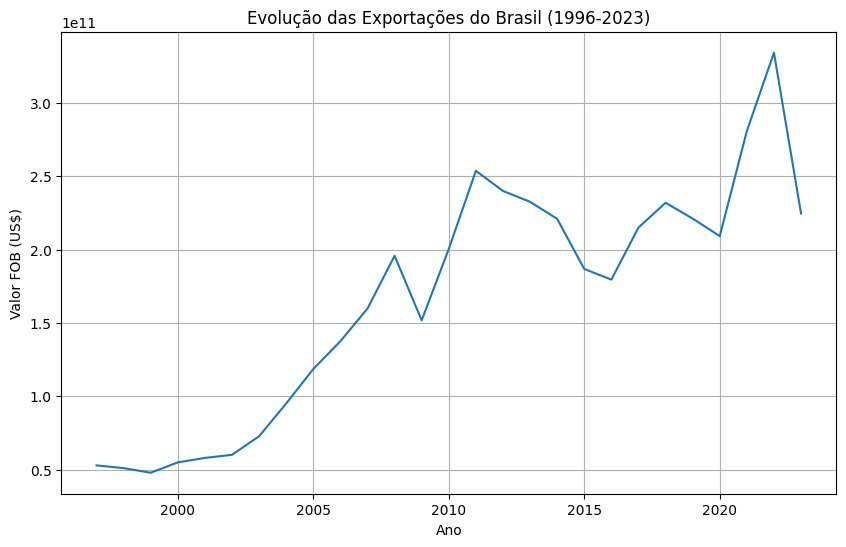

In [14]:
# Plotando a evolução das exportações ao longo dos anos
plt.figure(figsize=(10, 6))
plt.plot(exportacoes_ano['CO_ANO'], exportacoes_ano['VL_FOB'])
plt.title('Evolução das Exportações do Brasil (1996-2023)')
plt.xlabel('Ano')
plt.ylabel('Valor FOB (US$)')
plt.grid(True)
plt.show()


# Principais Países de Destino das Exportações Brasileiras

### Vamos explorar quais são os principais países de destino das exportações brasileiras.

In [15]:
# Unindo o DataFrame de exportações com o DataFrame de países para obter os nomes dos países
exportacoes_paises = pd.merge(df_exportacoes, df_paises, left_on='CO_PAIS', right_on='CO_PAIS')
exportacoes_paises.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,CO_PAIS_ISON3,CO_PAIS_ISOA3,NO_PAIS,NO_PAIS_ING,NO_PAIS_ESP
0,1997,11,74122000,10,249,SP,4,817600,0,0,3,840,USA,Estados Unidos,United States,Estados Unidos
1,1997,11,73082000,10,97,MG,7,130151,0,4292,6442,68,BOL,Bolívia,Bolivia,Bolivia
2,1997,11,84248119,11,196,SP,1,817800,32,3468,31510,188,CRI,Costa Rica,Costa Rica,Costa Rica
3,1997,11,48239090,10,586,MN,9,910600,0,0,1,600,PRY,Paraguai,Paraguay,Paraguay
4,1997,11,72112910,10,850,SP,1,817800,118,117505,103866,862,VEN,Venezuela,Venezuela,Venezuela


In [16]:
# Agrupando os dados de exportações por país de destino e somando os valores
exportacoes_pais = exportacoes_paises.groupby('NO_PAIS')['VL_FOB'].sum().reset_index()
exportacoes_paises

# print(exportacoes_paises)

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,CO_PAIS_ISON3,CO_PAIS_ISOA3,NO_PAIS,NO_PAIS_ING,NO_PAIS_ESP
0,1997,11,74122000,10,249,SP,4,817600,0,0,3,840,USA,Estados Unidos,United States,Estados Unidos
1,1997,11,73082000,10,97,MG,7,130151,0,4292,6442,68,BOL,Bolívia,Bolivia,Bolivia
2,1997,11,84248119,11,196,SP,1,817800,32,3468,31510,188,CRI,Costa Rica,Costa Rica,Costa Rica
3,1997,11,48239090,10,586,MN,9,910600,0,0,1,600,PRY,Paraguai,Paraguay,Paraguay
4,1997,11,72112910,10,850,SP,1,817800,118,117505,103866,862,VEN,Venezuela,Venezuela,Venezuela
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26921048,2023,7,2064900,10,193,SC,1,927800,71380,71380,37378,384,CIV,Costa do Marfim,Cote D'Ivore,Costa de Marfil
26921049,2023,8,84379000,10,63,RS,7,1017500,688,688,16865,32,ARG,Argentina,Argentina,Argentina
26921050,2023,1,68053090,10,239,SP,1,817800,945,945,13606,218,ECU,Equador,Ecuador,Ecuador
26921051,2023,8,73181900,10,40,SP,4,817600,1152,1152,8962,24,AGO,Angola,Angola,Angola


In [17]:
# Ordenando os países pelo valor total de exportações
exportacoes_pais = exportacoes_pais.sort_values(('VL_FOB'), ascending=False).head(10)
exportacoes_pais

# print(exportacoes_pais)

,NO_PAIS,VL_FOB
51,China,842639503787
79,Estados Unidos,592870719695
11,Argentina,320659770496
183,Países Baixos (Holanda),195087985245
4,Alemanha,137656341161
122,Japão,125443733091
50,Chile,104544559745
161,México,97881494060
118,Itália,89512351458
78,Espanha,86483049430


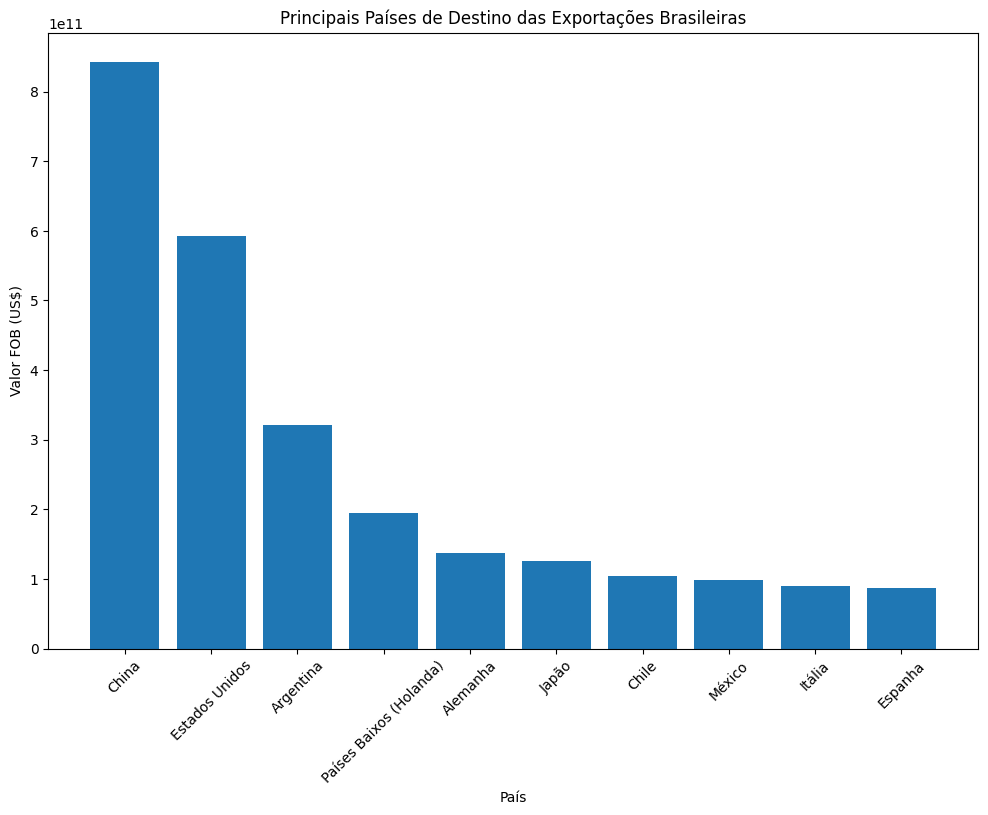

In [18]:
# Plotando os principais países de destino das exportações brasileiras
plt.figure(figsize=(12, 8))
plt.bar(exportacoes_pais['NO_PAIS'], exportacoes_pais['VL_FOB'])
plt.title('Principais Países de Destino das Exportações Brasileiras')
plt.xlabel('País')
plt.ylabel('Valor FOB (US$)')
plt.xticks(rotation=45)
plt.show()

# Principais Países de Origem das Importações Brasileiras

### Vamos explorar quais são os principais países de origem das importações brasileiras.

In [19]:
# Agrupando os dados de importações por país de origem e somando os valores
importacoes_pais = exportacoes_paises.groupby('NO_PAIS')['VL_FOB'].sum().reset_index()
importacoes_pais

# print(importacoes_pais)

,NO_PAIS,VL_FOB
0,A Designar,4603948
1,Afeganistão,208911989
2,"Aland, Ilhas",105446
3,Albânia,972019252
4,Alemanha,137656341161
...,...,...
261,Zona do Canal do Panamá,9501471
262,Zâmbia,173764273
263,África do Sul,30971397528
264,Áustria,3957230915


In [20]:
# Filtrando a linha "A Designar" da tabela de países de origem das importações. Achei interessante ocultar ela para manter o contexto e a lógica dos dados.
# para manter uma tabela limpa e objetiva. Segue o filtro:
importacoes_pais = importacoes_pais[importacoes_pais['NO_PAIS'] != 'A Designar']
importacoes_pais

,NO_PAIS,VL_FOB
1,Afeganistão,208911989
2,"Aland, Ilhas",105446
3,Albânia,972019252
4,Alemanha,137656341161
5,Andorra,4182693
...,...,...
261,Zona do Canal do Panamá,9501471
262,Zâmbia,173764273
263,África do Sul,30971397528
264,Áustria,3957230915


In [29]:
# Garantindo que os valores estejam no formato numérico (caso ainda não estejam)
importacoes_pais['VL_FOB'] = importacoes_pais['VL_FOB'].astype(float)

# Criando uma nova coluna formatada como moeda (em dólares)
importacoes_pais['VL_FOB_Formatado'] = importacoes_pais['VL_FOB'].apply(lambda x: f"${x:,.2f}")

In [30]:
# Ordenando os países pelo valor total de importações
importacoes_pais = importacoes_pais.sort_values('VL_FOB', ascending=False).head(10)
importacoes_pais

,NO_PAIS,VL_FOB,VL_FOB_Formatado
51,China,8.426395e+11,"$842,639,503,787.00"
79,Estados Unidos,5.928707e+11,"$592,870,719,695.00"
11,Argentina,3.206598e+11,"$320,659,770,496.00"
183,Países Baixos (Holanda),1.950880e+11,"$195,087,985,245.00"
4,Alemanha,1.376563e+11,"$137,656,341,161.00"
122,Japão,1.254437e+11,"$125,443,733,091.00"
50,Chile,1.045446e+11,"$104,544,559,745.00"
161,México,9.788149e+10,"$97,881,494,060.00"
118,Itália,8.951235e+10,"$89,512,351,458.00"
78,Espanha,8.648305e+10,"$86,483,049,430.00"


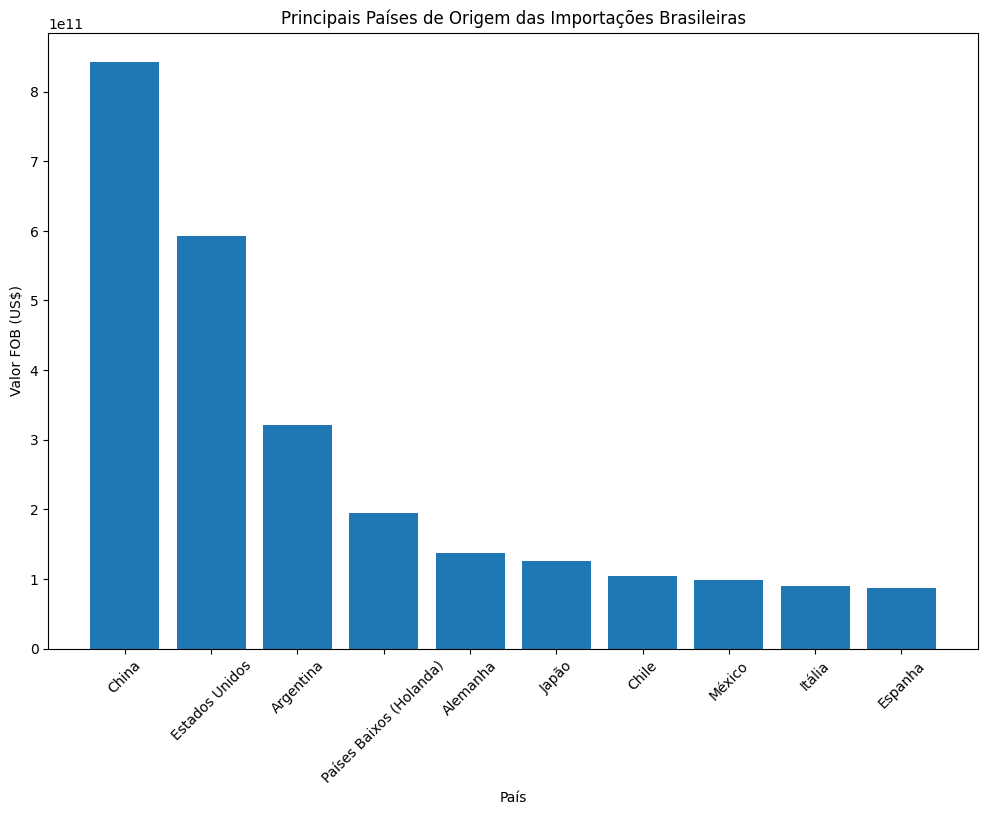

In [31]:
# Plotando os principais países de origem das importações brasileiras
plt.figure(figsize=(12, 8))
plt.bar(importacoes_pais['NO_PAIS'], importacoes_pais['VL_FOB'])
plt.title('Principais Países de Origem das Importações Brasileiras')
plt.xlabel('País')
plt.ylabel('Valor FOB (US$)')
plt.xticks(rotation=45)
plt.show()

# Evolução das Importações do Brasil ao Longo dos Anos

## Vamos analisar a evolução das importações do Brasil ao longo dos anos em termos de valor monetário.

In [33]:
# Agrupando os dados de importações por ano e somando os valores
importacoes_ano = df_exportacoes.groupby('CO_ANO')['VL_FOB'].sum().reset_index()
importacoes_ano

,CO_ANO,VL_FOB
0,1997,52947495532
1,1998,51076603549
2,1999,47945909310
3,2000,54993159648
4,2001,58032294243
5,2002,60147158103
6,2003,72776746690
7,2004,95121672369
8,2005,118597835407
9,2006,137581151209


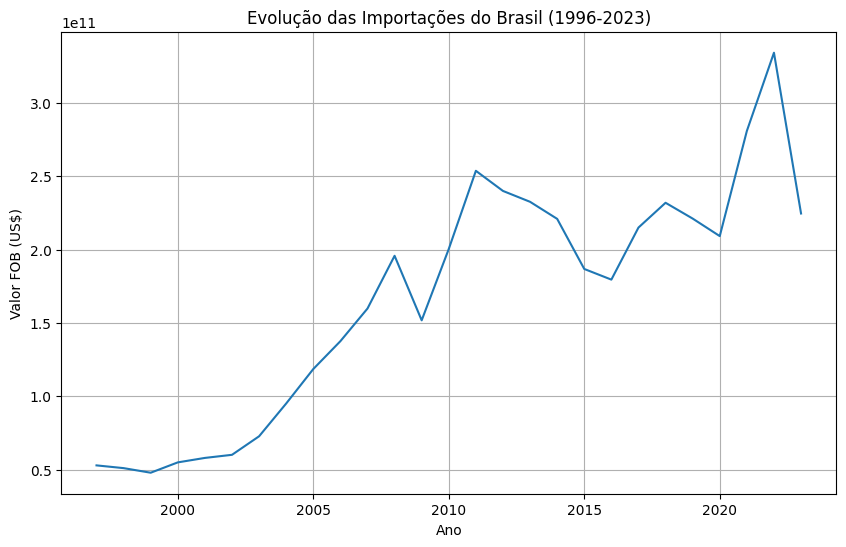

In [34]:
# Plotando a evolução das importações ao longo dos anos
plt.figure(figsize=(10, 6))
plt.plot(importacoes_ano['CO_ANO'], importacoes_ano['VL_FOB'])
plt.title('Evolução das Importações do Brasil (1996-2023)')
plt.xlabel('Ano')
plt.ylabel('Valor FOB (US$)')
plt.grid(True)
plt.show()

# Evolução das Exportações do Brasil ao Longo dos Anos

## Vamos analisar a evolução das exportações do Brasil ao longo dos anos em termos de valor monetário.

In [24]:
# Agrupando os dados de exportações por ano e somando os valores
exportacoes_ano = df_exportacoes.groupby('CO_ANO')['VL_FOB'].sum().reset_index()
exportacoes_ano

,CO_ANO,VL_FOB
0,1997,52947495532
1,1998,51076603549
2,1999,47945909310
3,2000,54993159648
4,2001,58032294243
5,2002,60147158103
6,2003,72776746690
7,2004,95121672369
8,2005,118597835407
9,2006,137581151209


In [27]:
# Plotando a evolução das exportações ao longo dos anos

# Criando um gráfico interativo com Plotly
fig = px.line(exportacoes_ano, x='CO_ANO', y='VL_FOB', title='Evolução das Exportações do Brasil (1996-2023)',
              labels={'CO_ANO': 'Ano', 'VL_FOB': 'Valor FOB (US$)'}, markers=True)

# Atualizando o layout para adicionar mais detalhes
fig.update_layout(
    xaxis_title='Ano',
    yaxis_title='Valor FOB (US$)',
    hovermode='x unified'
)
fig.show()


# Categorias de Produtos com Maior Valor de Exportação/Importação

## Vamos analisar as categorias de produtos que têm os maiores valores de exportação e importação.

In [15]:
# Agrupando os dados de exportações por categoria de produto (NCM) e somando os valores
exportacoes_produto = df_exportacoes.groupby('CO_NCM')['VL_FOB'].sum().reset_index()
exportacoes_produto

,CO_NCM,VL_FOB
0,1011010,23858316
1,1011090,117203
2,1011100,5986595
3,1011900,429115
4,1012000,3953
...,...,...
12258,99980202,1257128613
12259,99997101,7739491
12260,99997102,142693969
12261,99997103,1009906686


In [9]:
# Ordenando os produtos pelo valor total de exportações
exportacoes_produto = exportacoes_produto.sort_values('VL_FOB', ascending=False).head(10)
exportacoes_produto

,CO_NCM,VL_FOB
1692,26011100,361839043265
1024,12019000,344502553894
1769,27090010,344210358911
1543,23040090,110573831168
866,9011110,108175587121
5913,47032900,102971321341
1295,17011400,91674877882
1022,12010090,91123760892
71,2023000,88977694679
103,2071400,83093883691


    CO_NCM    VL_FOB
0  1011010  23858316
1  1011090    117203
2  1011100   5986595
3  1011900    429115
4  1012000      3953
5  1012100  46363388
6  1012900  28789943
7  1013000     43376
8  1019000     76890
9  1019010   7309400


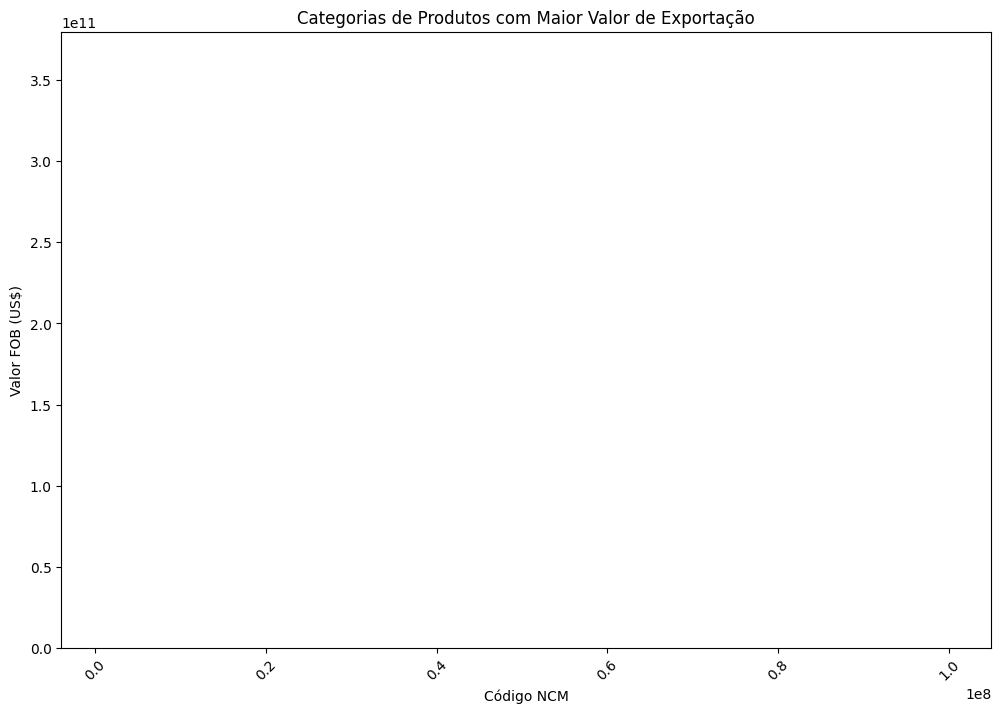

In [17]:
# Imprimindo as primeiras linhas do DataFrame de exportações
print(exportacoes_produto.head(10))

# Plotando as categorias de produtos com maior valor de exportação
plt.figure(figsize=(12, 8))
plt.bar(exportacoes_produto['CO_NCM'], exportacoes_produto['VL_FOB'])
plt.title('Categorias de Produtos com Maior Valor de Exportação')
plt.xlabel('Código NCM')
plt.ylabel('Valor FOB (US$)')
plt.xticks(rotation=45)
plt.show()


# Em caso de erro no gráfico no colab, execute no VSCode. Infelizmente o Colab buga o plot de alguns gráficos.

# Análise Regional


## Vamos verificar quais estados do Brasil têm os maiores valores de exportação e visualizar a distribuição geográfica das transações comerciais.

In [28]:
# Agrupando os dados de exportações por estado (UF) e somando os valores
exportacoes_estado = df_exportacoes.groupby('SG_UF_NCM')['VL_FOB'].sum().reset_index()
exportacoes_estado

,SG_UF_NCM,VL_FOB
0,AC,473524816
1,AL,15456051908
2,AM,24448222323
3,AP,5566215443
4,BA,182559507136
5,CB,29077219
6,CE,33839061888
7,DF,3943481352
8,ES,186220873071
9,GO,125581425363


In [29]:
# Ordenando os estados pelo valor total de exportações
exportacoes_estado = exportacoes_estado.sort_values('VL_FOB', ascending=False).head(10)
exportacoes_estado

,SG_UF_NCM,VL_FOB
29,SP,1132981668680
11,MG,567074347480
22,RJ,433347784013
26,RS,372633821881
20,PR,343214843983
16,PA,288841837054
14,MT,275579173137
8,ES,186220873071
4,BA,182559507136
27,SC,182387221330


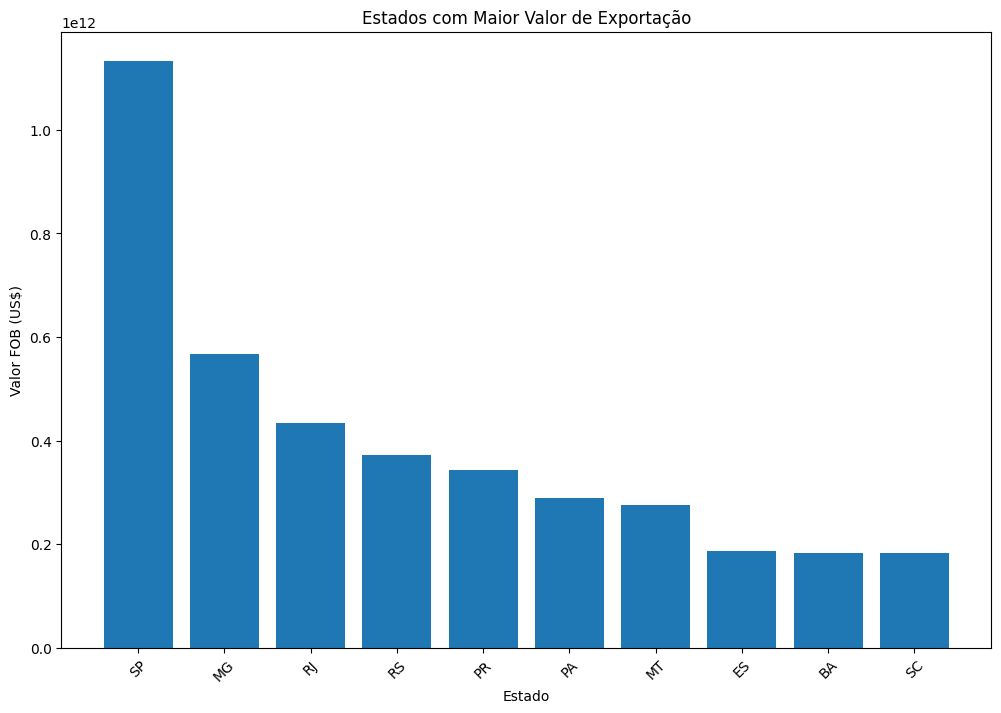

In [30]:
# Plotando os estados com maior valor de exportação
plt.figure(figsize=(12, 8))
plt.bar(exportacoes_estado['SG_UF_NCM'], exportacoes_estado['VL_FOB'])
plt.title('Estados com Maior Valor de Exportação')
plt.xlabel('Estado')
plt.ylabel('Valor FOB (US$)')
plt.xticks(rotation=45)
plt.show()

# Conclusão e Insights
Este projeto proporcionou uma análise abrangente das exportações do Brasil entre 1996 e 2023, gerando insights significativos sobre a evolução e distribuição das exportações ao longo dos anos.

Principais Descobertas:

Evolução das Exportações: Observamos um crescimento consistente nos valores das exportações ao longo das décadas, destacando-se picos significativos em determinados anos. Esta tendência positiva indica um fortalecimento do comércio exterior brasileiro.

Destinos das Exportações: Identificamos os principais países de destino das exportações brasileiras, com destaque para parceiros comerciais estratégicos como China, Estados Unidos e Argentina. Estes países representam uma parte substancial do valor total exportado, evidenciando a importância dessas relações comerciais.

Categorias de Produtos: As análises revelaram quais categorias de produtos possuem os maiores valores de exportação, destacando-se commodities como soja, petróleo bruto e minérios de ferro. Estes produtos são fundamentais para a economia de exportação do Brasil.

Análise Regional: A distribuição geográfica das exportações mostrou que estados como São Paulo, Minas Gerais e Rio de Janeiro são líderes em valor de exportação, refletindo a concentração industrial e agrícola nessas regiões.

Tendências Gerais: A análise ao longo dos anos proporcionou uma visão clara das tendências de mercado e ajudou a identificar oportunidades e desafios para o futuro do comércio exterior brasileiro.

Esses insights são cruciais para entender o panorama econômico e comercial do Brasil, fornecendo uma base sólida para futuras análises e estratégias de crescimento.